##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [3]:
%pip install -U -q 'google-genai>=1.4.0' # 1.4.0 is needed for chat history

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [4]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [5]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [6]:
MODEL_ID = "gemini-2.5-flash-preview-04-17" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash-preview-04-17","gemini-2.5-pro-exp-05-06"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [7]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Güneş sistemindeki en büyük gezegen hangisidir?"
)

Markdown(response.text)

Güneş sistemindeki en büyük gezegen **Jüpiter**'dir.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [8]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="Afrikadaki en büyük dağ hangisidir",
)

print(response)

total_tokens=11 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [9]:
import requests
import pathlib
from PIL import Image

IMG = "https://pbs.twimg.com/media/DZDoEX_WsAAakWe.jpg" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

55861

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

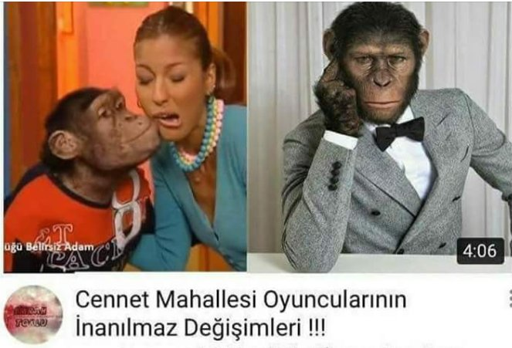

Bu resim, iki farklı görselin yan yana getirildiği bir mizah veya "değişim" temalı içeriği gösteriyor. Sol tarafta, Cennet Mahallesi dizisinden olduğu anlaşılan bir sahne yer alıyor. Bu sahnede bir kadın ve bir şempanze görülüyor. Sağ tarafta ise takım elbise giymiş, insan gibi poz veren dijital olarak düzenlenmiş bir şempanze görseli bulunuyor. Görselin altında "Cennet Mahallesi Oyuncularının İnanılmaz Değişimleri !!!" başlığı yer alıyor. Bu başlık ve görseller, dizideki hayvan karakterin yıllar içindeki "inanılmaz" değişimini mizahi bir dille ele alıyor gibi duruyor.

In [10]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Bu resim hakkında kısa bir şaka yaz"
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [11]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="internet nasıl çalışır, bir yavru köpeğe anlatır gibi anlat",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [12]:
prompt = """
    Ampülden nefret ettiğimi belirtecek 2 cümle önerebilir misin?
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

İşte ampullerden nefret ettiğinizi belirtecek iki cümle önerisi:

1.  Ampullerden resmen nefret ediyorum, varlıkları bile sinirimi bozuyor.
2.  Ampullere karşı içimde tarif edilemez, çok güçlü bir nefret duygusu var.

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [13]:
system_instruction = """
  İşinde uzman bir psikologsun.
  İkili ilişkileri çok iyi anlıyorsun.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [14]:
response = chat.send_message("Normal People kitabındaki ilişkiyi değerlendir.")

Markdown(response.text)

Normal People romanındaki Connell ve Marianne arasındaki ilişkiyi psikolog gözüyle değerlendirmemi istemeniz oldukça yerinde. Bu ilişki, modern edebiyatın insan ilişkilerindeki karmaşıklığı, zorlukları ve incelikleri ne kadar başarıyla yansıtabileceğinin çarpıcı bir örneğidir. Connell ve Marianne'in dinamikleri, özellikle genç yetişkinlik dönemindeki bireylerin yaşadığı kimlik arayışı, travma, sosyal baskı ve iletişim zorluklarının bir merceği gibidir.

Bu ilişkiyi psikolojik açıdan analiz ettiğimde dikkatimi çeken temel noktalar şunlardır:

1.  **Derin Bağ ve Anlayış (Temel Çekim Noktası):** İlişkinin en güçlü yanı, ikisi arasındaki neredeyse telepatik sayılabilecek derin bağ ve birbirlerini *gerçekten* anlama yetenekleridir. Sosyal çevrelerinde dışlanmış veya yanlış anlaşılmış hissettikleri noktalarda, birbirlerinde bir sığınak ve onay bulurlar. Bu, özellikle Marianne için, kendi ailesi tarafından bile görülemediği veya değersizleştirildiği bir ortamda hayati önem taşır. Connell ise Marianne'in yanında, popülerlik maskesini indirebildiği, entelektüel ve duygusal derinliğini gösterebildiği tek yer bulur. Bu temel bağ, tüm zorluklara rağmen onları tekrar tekrar birbirlerine çeker.

2.  **İletişimdeki Kronik Yetersizlik (En Büyük Problem Kaynağı):** İlişkinin en zayıf ve tekrar eden sorun kaynağı, ironik bir şekilde, iletişimdeki başarısızlıktır. Birbirlerini bu kadar derinden anladıkları anlar varken, en kritik dönüm noktalarında duygularını, ihtiyaçlarını veya endişelerini açıkça ifade edemezler. Varsayımlar, korkular (terk edilme, reddedilme, yetersiz hissetme) ve gurur, aralarına girer. Bu iletişim kazaları, tekrar eden ayrılıklara, incinmelere ve biriken kırgınlıklara yol açar. Duygusal zekaları belirli alanlarda yüksekken, çatışma çözme ve talepkar iletişim konularında oldukça yetersiz kalırlar.

3.  **Travmanın İlişki Üzerindeki Etkisi:** Marianne'in geçmiş travmaları (özellikle aile içi istismar ve önceki istismar dolu ilişkileri), benlik saygısını derinden etkilemiş ve sevgiye, yakınlığa ve sağlıklı bir ilişkiye karşı karmaşık bir tutum geliştirmesine neden olmuştur. Kendini değersiz görme eğilimi, zaman zaman kötü muameleyi normalleştirmesine veya sevgi gösterilerini hak etmediğini düşünmesine yol açabilir. Connell, her ne kadar Marianne'i seven ve değer veren biri olsa da, bu travmanın yarattığı hassasiyet ve savunma mekanizmalarıyla başa çıkmakta zorlanır. Connell'in kendi mental sağlık sorunları (anksiyete, depresyon) da ilişkiye bir başka katman ekler; kendi içsel zorlukları, Marianne'e tam olarak destek olmasını engelleyebilir veya kendi ihtiyaçlarını ifade etmesini zorlaştırabilir.

4.  **Bağlanma Dinamikleri:** İlişkileri, bağlanma teorisi açısından da ilginçtir. Marianne'in geçmişi göz önüne alındığında, kaygılı veya düzensiz (korkulu-kaçıngan) bağlanma örüntüleri göstermesi muhtemeldir; yakınlık ister ama aynı zamanda incinmekten korkar ve bu da itme-çekme davranışlarına yol açar. Connell ise başlangıçta daha kaçıngan veya en azından sosyal baskıya duyarlı bir bağlanma sergiler. Zamanla, birbirlerinin yanında daha güvenli bağlanma anları yaşasalar da, bireysel travmaları ve güvensizlikleri tekrar tekrar güvensiz bağlanma dinamiklerini tetikler.

5.  **Sosyal ve Kişisel Baskının Rolü:** Özellikle lise yıllarında sosyal statü ve dışlanma korkusu, Connell'in Marianne ile olan ilişkisini gizlemesine ve bu da Marianne'in incinmesine yol açan temel faktörlerden biridir. Üniversiteye geçtiklerinde dinamikler değişir; Marianne sosyal olarak daha rahatken, Connell aidiyet hissi bulmakta zorlanır. Bu değişen sosyal konumlar da ilişki içindeki güç dengesini ve bireylerin benlik algılarını etkiler.

6.  **Gelişim ve Büyüme (Bireysel ve Ortak):** İlişki, kusurlarına rağmen, her iki karakterin bireysel gelişiminde kritik bir rol oynar. Birbirleri sayesinde kendi içsel yaralarıyla yüzleşme, savunmasız olmayı öğrenme (zor da olsa) ve daha sağlıklı bir benlik inşa etme potansiyeli bulurlar. İlişkileri, zamanla daha olgun ve anlayışlı (yine de kusurlu) bir seviyeye evrilir. Karşılaştıkları zorluklar, onları hem birey olarak hem de birbirlerine karşı daha dirençli kılar.

**Genel Değerlendirme:**

Connell ve Marianne'in ilişkisi, "sağlıklı" bir ilişkinin geleneksel tanımlarından (istikrar, sürekli açık iletişim, karşılıklı ve tutarlı destek) sıklıkla uzaklaşır. Travma, güvensizlik, iletişim eksikliği ve dış baskılarla örülüdür. Ancak bu ilişkiyi bu kadar çarpıcı ve gerçekçi kılan da budur. Mükemmel olmayan, acı verici, kırılgan ama aynı zamanda inanılmaz derecede derin ve anlamlı bir bağı anlatır.

Bir psikolog olarak, bu ilişkinin bir "uyarıcı örnek" olabileceği kadar, insan bağının karmaşıklığını, travmalarımızın bizi nasıl şekillendirdiğini ve buna rağmen nasıl bağlantı kurmaya çalıştığımızı gösteren dokunaklı bir "vaka çalışması" sunduğunu söyleyebilirim. İlişkilerinin kendisi bir terapi süreci gibidir; birbirlerinin aynasında kendi yaralarını görürler ve birlikte (veya ayrı düştüklerinde) büyüme fırsatı bulurlar.

Sonuç olarak, Normal People'daki ilişki, romantik bir idealizasyon değil, gençlik aşkının, travmanın ve insan psikolojisinin ham, gerçekçi ve karmaşık bir portresidir. Analiz edilmesi, üzerinde düşünülmesi ve ders çıkarılması gereken çok katmanlı bir dinamiktir.

Here's another example using your new helpful coding assistant:

In [15]:
response = chat.send_message("Tamamdır, peki  benzeri bir durumda ne yapılmalı?")

Markdown(response.text)

Bu tür karmaşık ve zorlayıcı ilişki dinamiklerinde, sağlıklı bir yol haritası çizmek hem bireysel hem de ilişkisel düzeyde çaba ve farkındalık gerektirir. Connell ve Marianne'in durumuna benzer bir senaryoda atılması gereken adımları psikolojik bir bakış açısıyla şöyle sıralayabilirim:

1.  **Bireysel Düzeyde Yapılması Gerekenler:**

    *   **Öz Farkındalık Geliştirmek:** Kendi duygusal tetikleyicilerinizi, korkularınızı (terk edilme korkusu, yetersizlik hissi gibi), geçmiş travmalarınızın ilişkinizi nasıl etkilediğini anlamaya çalışın. Neden belirli durumlarda geri çekiliyor, neden belirli şekillerde tepki veriyor veya neden belirli davranışlara tolerans gösteriyorsunuz?
    *   **Geçmiş Travmalarla Yüzleşmek ve İyileşmek:** Özellikle istismar, ihmal veya güvensiz bağlanma deneyimleri gibi geçmiş travmaların bugünkü ilişki dinamikleriniz üzerindeki etkisini kabul edin. Bu travmaların yarattığı yaraları (düşük benlik saygısı, güven sorunları vb.) bireysel terapi yoluyla ele almak hayati önem taşır. Marianne'in hikayesinde bu konu çok belirgin.
    *   **Sağlıklı Benlik Saygısı İnşa Etmek:** Kendinizi değerli görmeyi öğrenmek, başkalarının davranışlarının sizin değerinizi belirlemediğini anlamak önemlidir. Bu, sağlıksız dinamiklere "dur" diyebilme ve kendi ihtiyaçlarınızı önceliklendirebilme gücü verir.
    *   **Bağlanma Örüntülerini Anlamak:** Kendi bağlanma stilinizi (güvenli, kaygılı, kaçıngan, düzensiz) ve bunun ilişkilerinizde nasıl tezahür ettiğini anlamak, tekrar eden döngüleri kırmanıza yardımcı olur.
    *   **Duygu Düzenleme Becerileri Geliştirmek:** Yoğun duygularla (anksiyete, öfke, hayal kırıklığı) başa çıkma ve tepkisel davranmak yerine daha bilinçli yanıtlar verme becerisi kazanmak.

2.  **İlişkisel Düzeyde Yapılması Gerekenler:**

    *   **Açık ve Savunmasız İletişim Pratiği:** Duygularınızı, ihtiyaçlarınızı ve endişelerinizi *açıkça ve dürüstçe* ifade etmeyi öğrenin. Varsayımlar yapmak yerine *sormak* ve *doğrulamak* çok önemlidir. "Sen şöylesin" demek yerine "Ben şöyle hissediyorum çünkü..." gibi "Ben" dilini kullanın.
    *   **Aktif Dinleme Becerileri:** Karşınızdaki kişiyi gerçekten anlamak için onu dinleyin, sözünü kesmeyin, savunmaya geçmeden önce duyduklarınızı sindirmeye çalışın. Duygularını ve bakış açısını *anladığınızı* belirtin, bu onunla aynı fikirde olduğunuz anlamına gelmez, sadece onu duyduğunuzu gösterir.
    *   **Sınırları Belirlemek ve Korumak:** İlişkide neyin kabul edilebilir neyin kabul edilemez olduğunu net bir şekilde ifade edin. Kendi sınırlarınıza saygı gösterilmesini talep edin ve partnerinizin sınırlarına saygı gösterin. Bu, özellikle Marianne'in geçmişindeki istismar bağlamında kritik öneme sahiptir.
    *   **Çatışma Çözme Becerileri Öğrenmek:** Her ilişkide çatışma olur, önemli olan bununla yapıcı bir şekilde başa çıkabilmektir. Soruna odaklanmak, kişiliğe saldırmamak, uzlaşmaya açık olmak ve "kazanma" ihtiyacından vazgeçmek.
    *   **Güven İnşa Etmek ve Onarmak:** Geçmişte yaşanan güvensizlikler veya kırılmalar varsa, bunların açıkça konuşulması ve güvenin yeniden inşa edilmesi için bilinçli çaba gösterilmesi gerekir. Bu, tutarlı davranışlar, verilen sözleri tutmak ve şeffaflıkla mümkündür.
    *   **Ortak Bir Vizyon Oluşturmak (Eğer İlişki Devam Edecekse):** Eğer her iki taraf da ilişki için çaba göstermeye kararlıysa, geleceğe yönelik beklentileri, ihtiyaçları ve birlikte nasıl daha sağlıklı bir dinamik kurabileceklerini konuşmak faydalıdır.

3.  **Profesyonel Destek Almak:**

    *   **Bireysel Terapi:** Özellikle travma, anksiyete, depresyon, düşük benlik saygısı veya bağlanma sorunları gibi bireysel zorluklar için vazgeçilmezdir. Bir terapist, kendi içsel dünyanızı anlamanızda ve healthier başa çıkma mekanizmaları geliştirmenizde size rehberlik edebilir.
    *   **Çift Terapisi:** İlişkinin dinamiklerini anlamak, iletişim becerilerini öğrenmek, tekrar eden döngüleri kırmak ve geçmişin yükünü ilişkiden ayırmak için profesyonel ve tarafsız bir alandır. Connell ve Marianne'in en çok ihtiyaç duyduğu şeylerden biri buydu; duygusal boşlukları kapatacak, doğru kelimeleri bulmalarına ve birbirlerini gerçekten dinlemelerine yardımcı olacak bir rehber.

**Özetle:**

Normal People'daki ilişki gibi durumlarda "yapılması gereken" tek bir sihirli formül yoktur. Ancak temel yaklaşım şudur: **Önce bireysel iyileşme ve farkındalık (çünkü ancak sağlıklı bireyler sağlıklı ilişkiler kurabilir), ardından bu farkındalığı kullanarak ilişkide açık, dürüst ve yapıcı bir iletişim kurma çabası, ve tüm bu süreçte profesyonel destekten çekinmemek.**

Bu tür ilişkilerdeki derin bağ ve anlayış çok değerlidir, ancak sağlıksız kalıplar bu bağı zamanla zedeleyebilir. Değişim zordur, acı verici olabilir ve zaman alır, ancak hem bireyin hem de ilişkinin sağlığı için bu adımları atmak genellikle en doğru yoldur.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [ ]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [36]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("Hikayedeki erkeğin adı neydi?")
Markdown(response.text)

NameError: name 'history_adapter' is not defined

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [30]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Güzel bir kurabiye tarifi verebilir misin?. Cevabında hiç türkçe harf olmasın",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Nefis Tereyagi Kurabiyesi",
    "recipe_description": "Agizda dagilan, yapimi kolay bir kurabiye tarifi. Cay saatleri icin ideal.",
    "recipe_ingredients": [
        "200 gram tereyagi (oda sicakliginda)",
        "1 su bardagi pudra sekeri",
        "1 yumurta sarisi",
        "1 paket vanilya",
        "Yarim paket kabartma tozu",
        "3 - 3.5 su bardagi un",
        "Bir tutam tuz"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

Türkiye'deki hukuk sistemini temsil eden bir görsel oluşturacağım. Adalet terazisi, Türk bayrağı ve önemli hukuk kitaplarını içeren, ciddiyet ve düzeni yansıtan bir kompozisyon tasvir edeceğim.


image/png


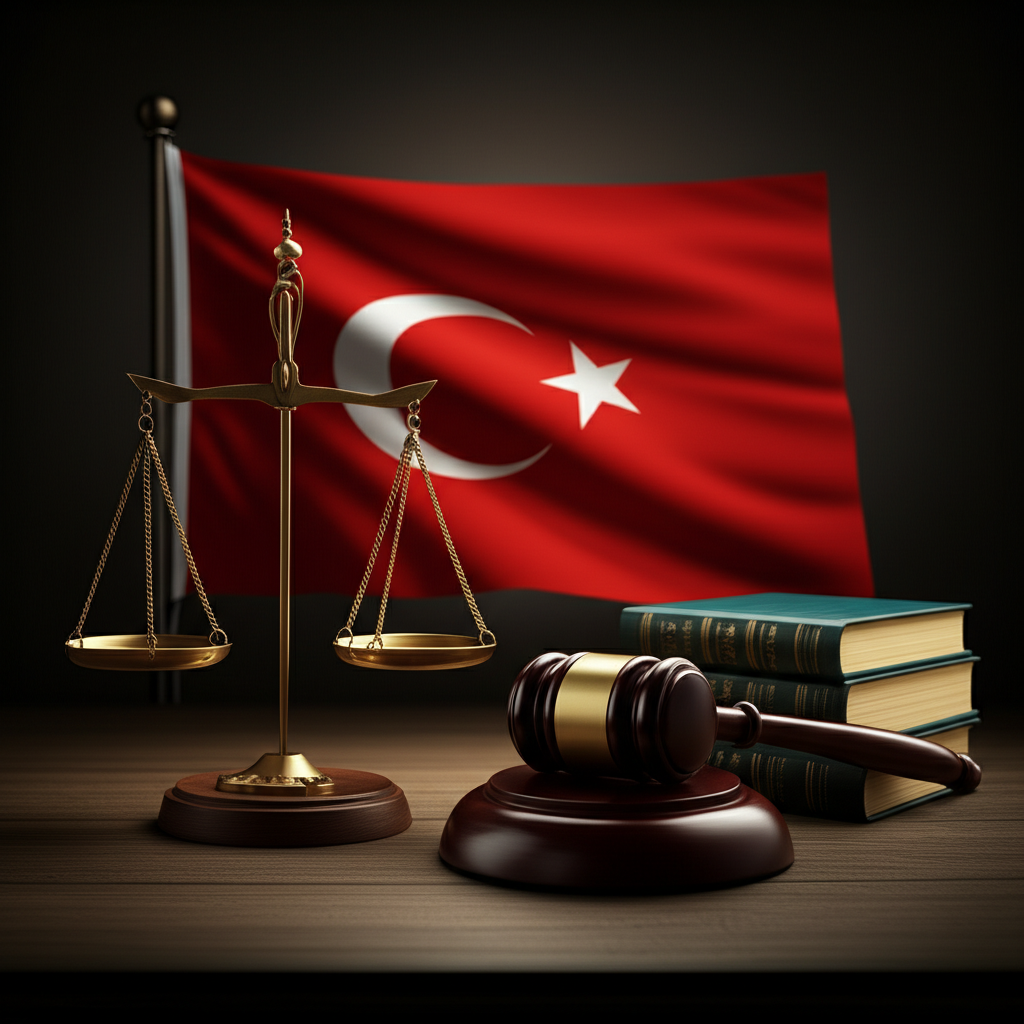

In [32]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Kayseri/Türkiyeyi resmedebilir misin?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [33]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents=" m&m ve bozuk paraların birbirine karıştığı bir hikaye anlat"
):
  print(chunk.text)
  print("*****************")

Harika bir fikir! İşte M&M'ler ve bozuk paraların başrolde olduğu, biraz da komik ve
*****************
 tatlı bir hikaye:

**Şekerli Hazine Karışıklığı**

Küçük Efe, dünyanın en mutlu çocuğu olabilirdi. Elinde rengarenk M&M dolu bir paket, hemen yanında ise yeni
*****************
 aldığı, parıldayan metal kumbarası vardı. Kumbara, gelecekte alacağı süper robotun hayalini temsil ediyordu; M&M'ler ise o anki saf mutluluğu.

Efe, bir
*****************
 yandan M&M'lerin lezzetini çıkarırken, diğer yandan da cebindeki parlak 1 liralık bozuk parayı kumbaranın daracık ağzından içeri atmaya çalışıyordu. "Şangır!"
*****************
 diye ses çıktı bozuk paradan, Efe gülümsedi. Sıra bir sonraki paraya gelmişti.

Ama işte o anda, beklenen veya hiç beklenmeyen şey oldu. Efe, parayı atarken bir yandan
*****************
 da paketten kırmızı bir M&M kapmak istedi. Eli titredi, M&M paketi yerinden fırladı ve tam da kumbaranın yanına "taka tak" diye döküldü!

Daha köt
*****************
üsü, sarsılan ku

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [35]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents=" Birkaç yunan filozofunun gömülü sistemler projesini tamamalamaya çalışması hakkında bir şarkı yaz"
)

Markdown(response.text)

Harika bir fikir! Antik Yunan bilgeliği ile modern teknolojinin çatışması... İşte bu temada, birkaç Yunan filozofunun gömülü sistem projesiyle boğuşmasını anlatan bir şarkı taslağı:

**Şarkı Adı:** Silikon Vadisi'nde Bir Agora

**(Giriş - Melankolik bir saz sesi gibi başlayan, sonra hafifçe hızlanan elektronik bir ritimle birleşen bir fon müziği)**

**Verse 1**
Tozlu kitaplar, mermer yontular,
Agora'da buluşmuşlar, asırlık ruhlar.
Ama bugün konu bambaşka bir dert,
Bir proje var elimizde, modern bir alet.
Teller, devreler, ufak bir çip var içinde,
Bir görev atanmış, bu dijital biçimde.
"Gömülü Sistem" demişler adına, ey dostlar,
Antik kafa, dijital harp, bizde bu ustalar?

**Nakarat**
Ah, gömülü sistem, tamam olmalı!
Bir lamba yanıp, bir sensör okunmalı!
Ama bu kodlar neden böyle anlaşılmaz ki?
Eudaimonia bu muydu, yoksa kısa devre mi?
Felsefe bitti, akıl tutuldu birden,
Lehim dumanı yükseliyor, sorularla her yerden!

**Verse 2**
Sokrates sordu: "Bu LED'in özü ne?"
"Gerçekliği nedir bu 'açık' ve 'kapalı'nın?"
Her byte'ın ahlakını sorguladı saatlerce,
"Akım geçer mi? Doğru beslendi mi? Söyleyin, neyce?"
Platon dedi: "İdeal bir kod olmalıydı ruhta!"
"Bu sıfırlar, birler çok kusurlu, ah bu yapı!"
Devre şemasının formasını aradı gökte,
"Bu dünyada bu kadar bug olması neden peki?"

**Nakasıt**
Ah, gömülü sistem, tamam olmalı!
Bir lamba yanıp, bir sensör okunmalı!
Ama bu kodlar neden böyle anlaşılmaz ki?
Eudaimonia bu muydu, yoksa kısa devre mi?
Felsefe bitti, akıl tutuldu birden,
Lehim dumanı yükseliyor, sorularla her yerden!

**Verse 3**
Aristo sınıflandırdı tüm telleri tek tek,
"Bu giriş, bu çıkış, bu toprak hattı" dedi net.
Mantık kuralları ile yazdı döngüyü sabırla,
"Eğer sensör > eşik ise, LED parlak yanmalı!"
Diogenes geldi, elinde feneri yok ama,
Çipin içine sığındı neredeyse anlama!
"Boş işler!" diye homurdandı yüzünde kinle,
"Bir fıçı yeterdi bana, bu teknoloji ne işe?"

**Köprü**
Gece çöktü, gözler kızardı ekrana bakmaktan,
Derleyici hata verdi, beyinler durmaktan!
"Syntax error!" diye bağırdı genç bir çırak,
"Syntax mı? O da neyin 'form'u acaba, budala!"
Tartışmalar büyüdü, Pynthan mı, C++ mı?
"Aslolan akıldır!" dedi biri, "Hayır, amaca ulaşma!"

**Nakarat**
Ah, gömülü sistem, tamam olmalı!
Bir lamba yanıp, bir sensör okunmalı!
Ama bu kodlar neden böyle anlaşılmaz ki?
Eudaimonia bu muydu, yoksa kısa devre mi?
Felsefe bitti, akıl tutuldu birden,
Lehim dumanı yükseliyor, sorularla her yerden!

**Outro**
(Müzik yavaşlar, yorgun ve hafifçe ironik bir ton)
Sokrates fısıldadı: "Bildiğim tek şey... hiçbir şey bilmediğim..."
(Çip sesi)
"...hele bu I²C protokolünü hiç!"
Platon iç çekti: "Belki de ideal proje hiç var olmamalıydı..."
Aristo: "Sonuçta çıktı ne? Bir LED yanıyor... ve sönüyor."
Diogenes kahkaha attı: "Gördünüz mü? Boş işler!"
(Son bir çip sesi, ardından sessizlik)

**(Müzik yavaşça solarak biter)**

Umarım bu şarkı taslağı hoşunuza gider! Filozofların karakteristik özelliklerini ve gömülü sistemlerin temel bileşenlerini mizahi bir dille bir araya getirmeye çalıştım.

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [ ]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word 'strawberry'.

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Commute Got You Down? This Jetpack Backpack Concept Could Be Your Ticket!

Tired of sitting in traffic with a heavy bag weighing you down? What if your everyday backpack could do a *little* more than just carry your laptop?

We stumbled upon this awesome concept sketch for a **Jetpack Backpack**, and frankly, our inner child (and outer commuter!) is pretty excited.

Forget bulky contraptions, this concept is designed to look like a **normal backpack**, right down to **padded strap support** and the ability to **fit an 18" laptop**. It's envisioned as **lightweight**, making it practical even when you're just walking.

But here's the fun part: it features **retractable boosters** at the bottom! The sketch suggests they're **steam-powered**, aiming for a **green/clean** form of propulsion. Plus, it charges with modern **USB-C**!

The one catch? The current concept suggests a **15-min battery life**. Maybe not for cross-country trips, but imagine zipping over that last traffic jam, or taking a quick aerial shortcut!

While just a sketch for now, this "Jetpack Backpack" is a fantastic blend of everyday practicality and futuristic fantasy. Who knows, maybe one day we'll all be flying to work!

**What do you think? Would you trade your car for a jetpack backpack? Let us know in the comments!**

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here is a summary of the article as a bulleted list:

*   The article presents a method called "Alchemist" for smoothly and parametrically editing the material properties (like color, shininess, or transparency) of objects in photographs.
*   The goal is to achieve photorealistic edits while preserving the object's shape and the original scene lighting.
*   Existing methods, such as intrinsic image decomposition or direct text-to-image model editing, struggle with the ambiguity of material properties or fail to disentangle material from shape.
*   The proposed method leverages the photorealistic capabilities of generative text-to-image (T2I) models by fine-tuning them on a large synthetic dataset.
*   The synthetic dataset is created by rendering 3D models of objects with varying material attributes and systematically changing one attribute at a time (e.g., roughness, transparency) according to a scalar "edit strength" value.
*   A modified Stable Diffusion 1.5 model is trained to accept an input image, an edit instruction, and the desired edit strength, learning to translate these inputs into an output image with the edited material property.
*   The model successfully generalizes to real-world images, producing photorealistic material changes while largely maintaining the original object's geometry and lighting.
*   It can realistically render complex effects like backgrounds visible through transparent objects and caustic lighting effects.
*   A user study showed that the method's edits were significantly more photorealistic and preferred over a baseline method (InstructPix2Pix).
*   Potential applications include creating product mock-ups and enabling 3D consistent material editing when combined with techniques like NeRF.
*   The research was presented in a paper at CVPR 2024.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

This audio is President John F. Kennedy's first State of the Union address, delivered on January 30, 1961.

In the speech, Kennedy provides a frank assessment of the nation's situation, highlighting both domestic and international challenges. Domestically, he details a struggling economy with high unemployment, low growth, and issues in housing, education, and healthcare, proposing immediate actions to address them. Internationally, he discusses the concerning balance of payments deficit and the growing threats posed by the Cold War and communism in various regions (Asia, Africa, Latin America). He calls for strengthening military, economic, and diplomatic capabilities, emphasizing the need for robust alliances, international cooperation (including in science and space), and a reformed, more decisive public service. The speech stresses the importance of facing difficulties realistically, preparing for future challenges, and requires dedication from all citizens to secure freedom and progress worldwide.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-04-18 12:09:07--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 172.67.14.163, 104.22.65.163, 104.22.64.163, ...
Connecting to download.blender.org (download.blender.org)|172.67.14.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   141MB/s    in 0.4s    

2025-04-18 12:09:08 (141 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/prqn913jn9t8


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/prqn913jn9t8


In [ ]:
print(video_file.state)

FileState.ACTIVE


In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

The video is a clip from the open-source animated short film "Big Buck Bunny" (produced by the Blender Foundation). It opens with a peaceful pastoral scene: rolling green hills, scattered trees (including pine and deciduous), rocks, flowers, and a stream, under a bright sky with fluffy pink clouds.

A small, plump, grey bird is perched on a branch, yawning and stretching, but is soon knocked off.

The camera then focuses on a large burrow entrance under a tree root, where a very large, fluffy, grey rabbit is sleeping. It wakes up, stretches, emerges from the burrow, and smiles contentedly at the sunny morning.

The rabbit enjoys the day, sniffing large white flowers and watching a beautiful pink butterfly land on its head. An apple falls from a tree, but the rabbit's attention is drawn back to the butterfly.

Hiding behind a tree root are three smaller rodent characters: two squirrels (one brown, one reddish-brown and spikier) and a grey chinchilla/hamster, all looking mischievous. The chinchilla holds a nut.

The squirrels begin to torment the rabbit by throwing small objects at it (rocks, nuts, and spiky chestnuts). The rabbit is initially startled and confused, but quickly becomes annoyed and then angry.

Driven by vengeance, Big Buck Bunny decides to retaliate. He prepares by sharpening a stick with a rock and creating a large spear using a vine as a bowstring. He takes aim at the squirrels hiding behind a tree and shoots the spear, which punctures the tree trunk.

Undeterred, the squirrels continue their harassment. Big Buck then sets up a trap: a series of sharpened sticks concealed under leaves on the ground, connected by a vine which he pulls taut like a tripwire.

The angry flying squirrel tries to knock a peach from a tree but ends up knocking it towards the stakes, where it gets impaled. Big Buck then catches the flying squirrel.

In the final scene before the credits, Big Buck Bunny is seen happily flying the terrified flying squirrel like a kite.

The credits roll, featuring brief animated appearances of the chinchilla and the red squirrel interacting with the text, and finally the little bird flying the flying squirrel (still as a kite) past the credits.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

Based on the video, here is a summary of the Google I/O 2024 keynote:

The keynote highlights Google's progress in the "Gemini era," integrating their multimodal AI models across their products and introducing new capabilities and models. Key announcements and features include:

1.  **Gemini Integration:** Gemini is now integrated into all of Google's 2 billion user products, enhancing existing features.
2.  **Gemini 1.5 Pro in Workspace:** Available today in Workspace Labs, it can summarize long emails and potentially other documents. It can also summarize recorded Google Meet meetings.
3.  **Gemini in Google Photos:** Enables deeper search capabilities, allowing users to find specific memories or track progress over time by understanding the content within photos and videos.
4.  **Expanded Context Window:** Gemini 1.5 Pro's context window is expanded to 2 million tokens, allowing it to process much larger amounts of information simultaneously (e.g., summarizing very long documents or videos).
5.  **Project Astra:** A prototype for a universal AI agent that is truly helpful in everyday life. Demos show the agent understanding real-time visual and audio input to explain code, remember object locations, and even suggest creative ideas (like a band name for a dog and a toy).
6.  **Gemini 1.5 Flash:** A new, lighter-weight, faster, and more cost-efficient multimodal model designed for scaling, while still retaining strong reasoning and long-context capabilities.
7.  **Veo:** A new, highly capable generative video model that creates high-quality 1080p videos from text, image, and video prompts.
8.  **Trillium TPUs:** The 6th generation of Google's custom chips for AI/ML, delivering a 4.7x improvement in compute performance per chip over the previous generation.
9.  **Generative AI in Google Search:** AI Overviews are becoming more powerful, able to handle complex, multi-part questions and provide quick answers and summaries. This is coming to over 1 billion people by the end of the year.
10. **Google Lens Integration:** Soon, users can ask questions about a video by pointing Google Lens at it, getting relevant information instantly (e.g., troubleshooting a turntable based on visual input).
11. **Gems:** Customizable personal AI experts within Gemini, available for Gemini Advanced subscribers. Users can create specific assistants for their needs by providing instructions, which can then handle complex tasks and answer questions across multiple uploaded files (up to 1500 pages per PDF or multiple files for project insights). Gemini Advanced offers a 1 million token context window for this.
12. **AI in Android:** Gemini is being reimagined at the core of Android to be more context-aware, anticipating user needs and providing helpful suggestions in the moment. Gemini Nano with Multimodality will enable the phone to understand the world through sight, sound, and spoken language.
13. **Gemma & PaliGemma:** Expansion of the open model family. PaliGemma is the first vision-language open model, available now.
14. **Gemma 2:** The next generation of Gemma, including a new 27 billion parameter model, will be available in June for driving AI innovation responsibly.
15. **LearnLM:** A new family of models based on Gemini and fine-tuned for learning. A new feature in YouTube uses LearnLM to make educational videos more interactive, allowing users to ask clarifying questions, get explanations, and take quizzes.
16. **Responsible AI:** Google emphasizes its commitment to building AI responsibly through practices like red teaming to identify and address potential risks while maximizing benefits for society.

Overall, the keynote showcases Google's focus on making AI, particularly through the Gemini family of models, more powerful, multimodal, context-aware, and helpful across its platforms and products, while also emphasizing responsible development.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/ql5fbzexj5rl', display_name='research papers', model='models/gemini-2.5-flash-preview-04-17', create_time=datetime.datetime(2025, 4, 18, 12, 10, 43, 598484, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 4, 18, 12, 10, 43, 598484, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 4, 18, 13, 10, 42, 12326, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/ql5fbzexj5rl' display_name='research papers' model='models/gemini-2.5-flash-preview-04-17' create_time=datetime.datetime(2025, 4, 18, 12, 10, 43, 598484, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 4, 18, 12, 10, 43, 598484, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 4, 18, 13, 10, 42, 12326, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

Both research papers share the goal of developing and presenting the Gemini family of highly capable multimodal models. These models aim to understand and reason across image, audio, video, and text data.

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(values=[-0.0010864572, 0.0069392114, 0.017009795, -0.010305981, -0.009999484, -0.0064486223, 0.0041451487, -0.005906698, 0.022229617, -0.018305639, -0.018174557, 0.022160593, -0.013604425, -0.0027964567, 0.12966625, 0.028866312, 0.0014726851, 0.03537643, -0.015166075, -0.013479812, -0.019288255, 0.010106378, -0.0043296088, 0.018035924, 0.00295039, -0.007934979, -0.005416007, -0.0095809875, 0.040398005, -0.0020784356, 0.011551388, 0.009726445, 0.006670387, 0.020050988, -0.00747873, -0.0012074928, 0.0047189263, -0.006359583, -0.01718203, -0.023562348, -0.0051814457, 0.023801394, -0.004928927, -0.016113443, 0.01672777, -0.0069929743, -0.012722719, -0.0137646515, -0.041852377, -0.0011546672, 0.017030545, -0.0022786013, 0.011707037, -0.18675306, -0.035211734, -0.011472648, 0.01970727, 0.0012368832, -0.020796346, -0.018513134, -0.006821043, -0.01843726, -0.00827558, -0.042159837, 0.0038724025, 0.01933339, 0.0139452815, 0.025059255, 0.0015087503, -0.016094029, -0.0035785383,

You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

3

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/gemini-2/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./Get_started_thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.